# Assignment 2

- KNN regression and classification on City Bike dataset

- linear regression on City Bike dataset

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn import neighbors

# Problem 1: median versus mean

we want to estimate some unknown parameter $\mu^*$ 

where we only make observations of $n$ examples.

$$x_i = \mu^* + w_i$$ 

for some noise $w_i$. 

We can estimate the parameter by mean or median of $n$ examples of $x_i$

Let's explore this problem across 1000 trials. 

- Average error of over 1000 trials 

$$
e(\text{mean}) = \frac{1}{N}\sum_{i=1}^N  \left| \bar x_i - \mu^*\right| \\[1em]
e(\text{median}) = \frac{1}{N}\sum_{i=1}^N  \left|\tilde x_i - \mu^*\right|
$$

$N$ is number of trials

$\bar x_i = \frac{1}{n}\sum_{j=1}^n x_j$

$\tilde x_i = \text{Median}(x_1, ..., x_n)$

- The effect of **outliers** (corrupted example) on median estimator is much less than that on mean estimator. Even if there are a lot of outliers, the error of median estimator is very small compared to mean estimator.

- Plot the average error of the median/mean over 1000 trials as a function of number of observations are corrupted.

Text(0.5, 1.0, 'Average error of estimator: Mean vs. Median')

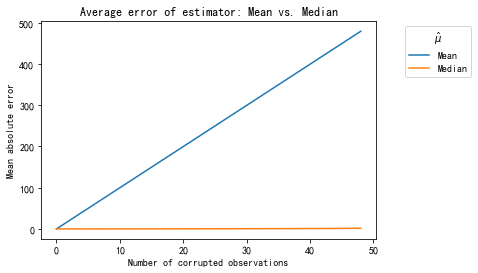

In [9]:
n = 100
TRIALS = 1000
mustar = 1
x = mustar + np.random.randn(n,TRIALS)

max_corrupt=49
mean_error = 0. * np.arange(0,max_corrupt)
median_error = 0. * np.arange(0,max_corrupt)
for k in range(max_corrupt):
    if k > 0:
        x[k-1]=1000. # corruption

    mean_error[k] = np.mean(np.abs(np.mean(x, axis=0) - mustar)) ##your code here
    median_error[k] = np.mean(np.abs(np.median(x, axis=0) - mustar))

plt.plot(mean_error, label='Mean')
plt.plot(median_error, label='Median')
plt.legend(title=r"$\hat \mu$", bbox_to_anchor=(1.3, 1))
plt.xlabel("Number of corrupted observations")
plt.ylabel("Mean absolute error")
plt.title("Average error of estimator: Mean vs. Median")

# Problem 2: k-nearest neighbors

The goal of k-nearest neighbors (KNN) with a loss $\ell$ is to find a function $\widehat{f}_K(x)$ that minimizes
$$
\widehat{R}(f) = \frac{1}{n} \sum_{i=1}^n \ell(f_K(x_i),y_i)
$$

KNN provides an estimate of the corresponding label $y$ for the a new query point $x$ by solving an optimization over the $k$ closest neighbors to $x$. 

$N_k(x)$: The $k$ nearest neighborhood set of $x$ is the set of $k$ points in the training set that are closest to $x$ with respect to some metric $d(x,x')$. 
$$
N_k(x) = \{ i \in [n] \mid \textrm{ $d(x,x_i)$ is one of the $k$ smallest distances from $x$} \}
$$
We can then define $f_K(x)$ as
$$
f_K(x) = \arg \min_y \sum_{i \in N_k(x)} \ell(y,y_i)
$$

## KNN for regression

If loss function is squared loss $\ell(y,y_i) = (y-y_i)^2$, then solution is mean of labels across all $k$ closest neighbors to $x$.
$$
f_K(x) = \frac{1}{k}\sum_{i \in N_k(x)} y_i
$$

If the loss function is absolute loss $|y - y_i|$, then solution is median of labels across all $k$ closest neighbors to $x$.

$$
f_K(x) = \text{Median}(\left\{y_i | i \in N_k(x)\right\})
$$

## KNN for classification

- for multi-class classification with $y_i \in [k]$, i.e., $y_i \in \{0,1,2,...,k-1\}$

    If the loss is 0/1 loss $\ell(y,y_i) = \mathbb{1}(y \neq y_i)$, then solution is mode of labels/majority vote across all $k$ closest neighbors to $x$

$$
f_K(x) = \textrm{mode}( \{y_i \mid i \in N_k(x) \} )
$$

- For binary classification with $y_i \in \{0,1\}$ this takes an easy form
$$
f_K(x) = \mathbb{1} \left ( \left [ \frac{1}{k} \sum_{i \in N_k(x)} y_i \right ] > 0.5 \right )
$$

we could also use $\geq 0.5$, but generally take $k$ to be odd to avoid any ties.

## Choice of distance

Euclidean distance $d(x,x') = \|x - x'\|_2$

## Simple implementation

provide a simple implementation of KNN. 

Advanced versions do a lot of pre-processing of the data to make the nearest neighbors search work very quickly, e.g., process data to be a Quad-tree

KNN never really "trained" it. 

Rather, when given test data, find the closest representatives and predict test labels based on those closest representatives from the training set. 

That being said, if you were to use knn as a baseline in practice, you would run experiments on training/testing data to find the best choice of $k$.

In [11]:
def yourknn(x: np.ndarray, X: np.ndarray, y: np.ndarray, k: int=1, DEBUG: bool=False) -> np.ndarray:
    """
    input
    x: test data. np.ndarray of shape (m,d)
    X: training data. np.ndarray of shape (n,d)
    y: training labels. np.ndarry of shape (n,)
    k: number of neighbors to consider 1<=k<=n
    Example:
    X[0] is example 0. y[0] is the label for example 0.
    x[0] is the first query point.
    
    output:
    yhat: predicted labels. np.ndarray of shape (m,)
    """
    m,d = x.shape
    n,d1 = X.shape
    assert(d==d1)

    # calculate pairwisedistance of test data and training data. shape (m,n)
    pairwisedistance = np.linalg.norm(x[:,None,:]-X[None,:,:],axis=2)
    
    # check if pairwisedistance is calculated correctly
    if (DEBUG):
        for i in range(m):
            for j in range(n):
                assert np.isclose(pairwisedistance[i,j],np.linalg.norm(x[i] - X[j]))
    
    # construct a neighbors array of shape (m,k)
    neighbors = np.argsort(pairwisedistance,axis=1)[:,:k]
    # prediction
    yhat = np.mean(y[neighbors],axis=1)

    return yhat

For $k=1$ your function should go through each of the training points.

Text(0.5, 1.0, 'K-nearest neighboring regression k = 1')

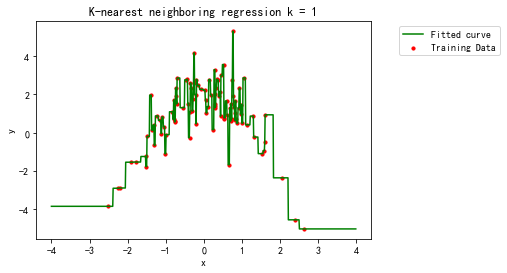

In [27]:
def f(x):
    return - x ** 2 + 2 + np.random.randn(x.shape[0])

k = 1
n = 100 # size of training set
m = 800 # size of test set
d=1 # number of features
X_train = np.random.randn(n, d)  # training data  
X_test = np.arange(-4,4,0.01)[:,None] # test data  
y_train = f(X_train[:,0])  # training label 
y_test = f(X_test[:,0])  # test label 
y_testpred = yourknn(X_test, X_train, y_train, k=k)

plt.plot(X_test[:,0], y_testpred, c = 'green', label="Fitted curve")
# plt.scatter(X_test[:,0], y_test, s=5, label="Data")
plt.scatter(X_train[:,0], y_train, s=10, c = 'red', label="Training Data")
plt.legend(bbox_to_anchor=(1.4, 1))
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"K-nearest neighboring regression k = {k}")

# Problem 2: Linear regression and classification

Citi Bike is a public bicycle sharing system in New York City. There are hundreds of bike stations scattered throughout the city. Customers can check out a bike at any station and return it at any other station. Citi Bike caters to both commuters and tourists. Details on this program can be found at https://www.citibikenyc.com/

For this problem, you will build models to predict Citi Bike usage, in number of trips per day.

The dataset consists of Citi Bike usage information and weather data recorded from Central Park. 

Date files: `citibike_*.csv`, `weather.csv`

In the `citibike_*.csv` files, we see:

1. date

2. trips: the total number of Citi Bike trips. This is the outcome variable.

3. n_stations: the total number of Citi Bike stations in service

4. holiday: whether or not the day is a work holiday

5. month: taken from the date variable

6. dayofweek: taken from the date variable

In the `weather.csv` file, we have:

1. date

2. PRCP: amount precipitation (i.e. rainfall amount) in inches 

3. SNWD: snow depth in inches

4. SNOW: snowfall in inches

5. TMAX: maximum temperature for the day, in degrees F

6. TMIN: minimum temperature for the day, in degrees F

7. AWND: average windspeed

You are provided a training set consisting of data from 7/1/2013 to 3/31/2016, 

and a test set consisting of data after 4/1/2016. 

The weather file contains weather data for the entire year. 

## Part a: Read in and merge the data

In [29]:
leadstring = "/Users/wenxinxu/Desktop/SDS565/data/citibike/"
train = pd.read_csv(leadstring+"citibike_train.csv")
test = pd.read_csv(leadstring+"citibike_test.csv")
weather = pd.read_csv(leadstring+"weather.csv")
# Merge the training and test data with the weather data, by date.
merged_train = train.merge(weather,on='date')
merged_test = test.merge(weather, on="date")
# Drop the date column
merged_train_drop = merged_train.drop('date',axis=1)
merged_test_drop = merged_test.drop('date', axis=1)


## Part b: Visualize data

As always, before you start any modeling, you should look at the data. 

Make plots (histogram, scatterplot, heatmap) of some of the numeric variables. 


In [ ]:
#Quantitative Variables
quantvars = ['trips', 'n_stations', 'PRCP', 'SNWD', 'SNOW', 'TMAX', 'TMIN', 'AWND']

merged_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001 entries, 0 to 1000
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1001 non-null   object 
 1   trips       1001 non-null   int64  
 2   n_stations  1001 non-null   int64  
 3   holiday     1001 non-null   bool   
 4   month       1001 non-null   object 
 5   dayofweek   1001 non-null   object 
 6   PRCP        1001 non-null   float64
 7   SNWD        1001 non-null   float64
 8   SNOW        1001 non-null   float64
 9   TMAX        1001 non-null   int64  
 10  TMIN        1001 non-null   int64  
 11  AWND        1001 non-null   float64
dtypes: bool(1), float64(4), int64(4), object(3)
memory usage: 94.8+ KB


- Look for outliers and strange values.  

    - AWND has 3 outliers in training set and 8 outliers in test set.


- Look for missing data signified by NA.  

    - No missing data in both training set and test set.


- Comment on any steps you take to remove entries or otherwise process the data. 

    - I dropped AWND outliers in training set and test set.


- Also comment on whether any predictors are strongly correlated with each other. 

    - Positive correlation: TMIN and TMAX (+0.97)
    
    
- Plot the max temperature against the min temperature. Is there a relationship? 

    - There is a strong linear relationship


- What's the correlation between each predictor (feature) against the length of trips?

1) Based on the correlation heatmap (please see heatmap below):

    TMAX and TMIN have relatively strong positive correlation agianst length of trips: 0.76 and 0.73, i.e. the length of trips increases as the maximum/minimum temperature of a day increases.

    SNWD and AWND have a medium negative correlation agianst length of trips: -0.47 and -0.47, i.e., the length of trips increases as the snowfall in inches/average windspeed of a day decreases.
            
    PRCP have a small negative correlation agianst length of trips: -0.27, i.e., the length of trips increases as the snowfall in inches/average windspeed of a day decreases.
        
    
2) Based on these scatter plots (please see plots below):
    
    The shorter length of trips can be found in both small or large number of stations.
            
    The length of trips is shorter on holiday

    The length of trips have cycle of seasons, longer in summer while shorter in winter.
            
    The length of trips in weekends are shorter than that in weekdays
            
    The length of trips decreases as the precipitation amount increases

**Comment**: Minimum of `AWND` variable (average windspeed) in both training set and test set is -9999, which is out of the range of real windspeed.

In [30]:
merged_test.describe()

,trips,n_stations,PRCP,SNWD,SNOW,TMAX,TMIN,AWND
count,183.000000,183.000000,183.000000,183.0,183.0,183.000000,183.000000,183.000000
mean,45204.240437,495.486339,0.107869,0.0,0.0,77.666667,61.803279,-432.785792
std,11389.449769,42.815584,0.246900,0.0,0.0,11.919756,11.419791,2050.954886
min,10697.000000,461.000000,0.000000,0.0,0.0,43.000000,26.000000,-9999.000000
25%,38004.000000,468.000000,0.000000,0.0,0.0,71.000000,54.000000,2.900000
50%,46075.000000,472.000000,0.000000,0.0,0.0,81.000000,65.000000,4.300000
75%,53369.000000,510.000000,0.070000,0.0,0.0,86.000000,71.000000,5.400000
max,67810.000000,597.000000,1.650000,0.0,0.0,96.000000,81.000000,12.800000


In [31]:
merged_train.describe()

,trips,n_stations,PRCP,SNWD,SNOW,TMAX,TMIN,AWND
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,25021.621379,354.182817,0.119311,0.893207,0.113087,62.621379,48.121878,-24.608591
std,11517.483767,55.237302,0.345714,2.895540,0.755803,19.086527,18.025458,547.145313
min,876.000000,292.000000,0.000000,0.000000,0.000000,15.000000,-1.000000,-9999.000000
25%,15545.000000,324.000000,0.000000,0.000000,0.000000,46.000000,35.000000,3.800000
50%,26629.000000,327.000000,0.000000,0.000000,0.000000,64.000000,50.000000,4.900000
75%,34208.000000,331.000000,0.040000,0.000000,0.000000,80.000000,64.000000,6.700000
max,52706.000000,475.000000,4.970000,18.900000,11.000000,98.000000,83.000000,14.500000


#### 1. Use the pandas isna function to see if any columns have NA values.

**Comment**: No missing data in the training set and testing set.

In [33]:
## code here
pd.isna(merged_train_drop).sum()  # No missing data in training set

trips         0
n_stations    0
holiday       0
month         0
dayofweek     0
PRCP          0
SNWD          0
SNOW          0
TMAX          0
TMIN          0
AWND          0
dtype: int64

In [34]:
## code here  
pd.isna(merged_test_drop).sum()  # No missing data in test set

trips         0
n_stations    0
holiday       0
month         0
dayofweek     0
PRCP          0
SNWD          0
SNOW          0
TMAX          0
TMIN          0
AWND          0
dtype: int64

#### 2. plot histograms of the columns. Anything problematic?

left/right-skewed distribution, outliers, and other things you noticed here

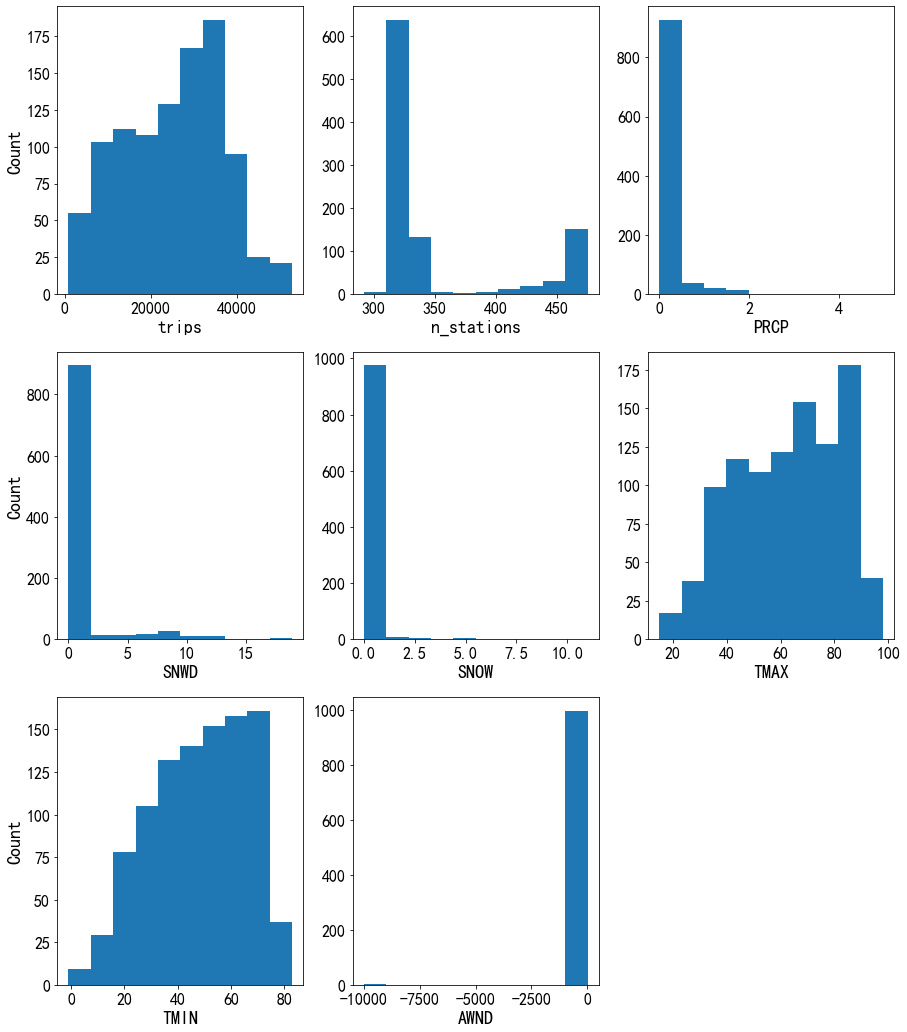

In [34]:
#Quantitative Variables
quantvars = ['trips', 'n_stations', 'PRCP', 'SNWD', 'SNOW', 'TMAX', 'TMIN', 'AWND']

fig, ax = plt.subplots(3,3, figsize=(15,18))

for i, var in zip(np.arange(len(quantvars)), quantvars):
    col = i%3
    row = int(i/3)
    ax[row,col].hist(merged_train_drop[var])
    ax[row,col].set_xlabel(var, fontsize=18)
    ax[row,col].tick_params('both', labelsize=16)
    if col==0:
        ax[row,col].set_ylabel("Count", fontsize=18)
        
ax[2,2].axis('off')
plt.show()

#### 3. remove any examples you think warrant removing. Explain your reasoning in this markdown cell.

In [ ]:
## AWND has some outliers that can be removed
merged_train_drop.iloc[merged_train_drop.AWND.values < 0,:]

,trips,n_stations,holiday,month,dayofweek,PRCP,SNWD,SNOW,TMAX,TMIN,AWND
209,4980,322,False,Jan,Sun,0.00,3.9,0.0,34,17,-9999.0
880,15830,457,False,Nov,Sat,0.02,0.0,0.0,64,45,-9999.0
881,18452,456,False,Nov,Sun,0.00,0.0,0.0,49,38,-9999.0


In [ ]:
merged_test_drop.iloc[merged_test_drop.AWND.values < 0,:]

,trips,n_stations,holiday,month,dayofweek,PRCP,SNWD,SNOW,TMAX,TMIN,AWND
34,32391,467,False,May,Fri,0.25,0.0,0.0,65,57,-9999.0
35,42063,464,False,May,Sat,0.00,0.0,0.0,73,56,-9999.0
36,28661,466,False,May,Sun,0.00,0.0,0.0,59,46,-9999.0
37,42787,468,False,May,Mon,0.00,0.0,0.0,66,43,-9999.0
39,44803,471,False,May,Wed,0.00,0.0,0.0,68,52,-9999.0
138,58154,536,False,Aug,Wed,0.00,0.0,0.0,88,68,-9999.0
139,53487,543,False,Aug,Thurs,0.01,0.0,0.0,86,69,-9999.0
140,52037,547,False,Aug,Fri,0.00,0.0,0.0,90,75,-9999.0


I dropped 3 rows of wind speed outliers (-9999) in training set and 8 rows of wind speed outliers (-9999) in test set.

In [63]:
## code here. To do this think about how the boolean indexing from above could help.
merged_train_drop = merged_train_drop[merged_train_drop.AWND>0]
merged_test_drop = merged_test_drop[merged_test_drop.AWND>0]

# merged_train_drop = merged_train_drop.iloc[merged_train_drop.AWND.values >= 0,:]
# merged_test_drop = merged_test_drop.iloc[merged_test_drop.AWND.values >= 0,:]

### Comment on whether any predictors are strongly correlated with each other.

### heatmap

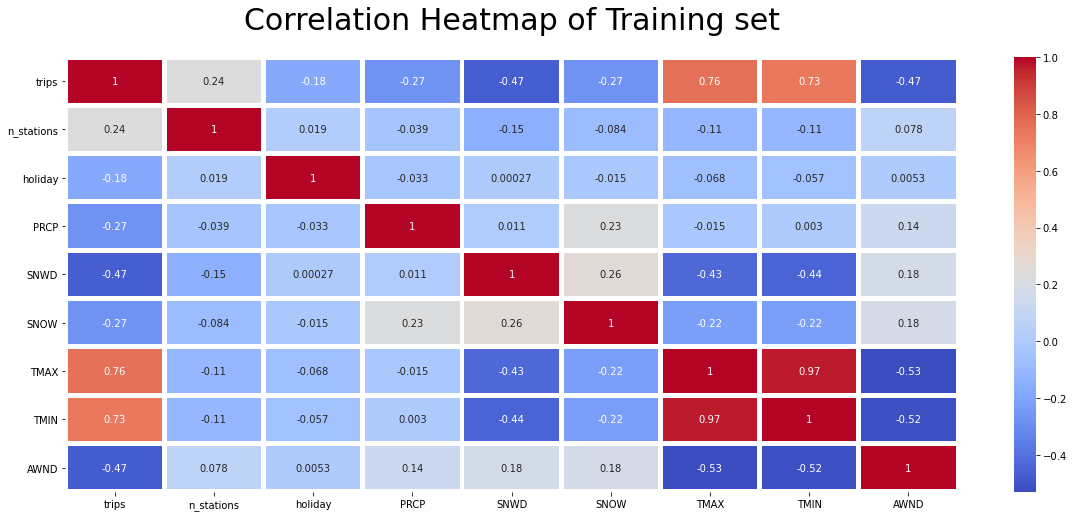

In [66]:
plt.figure(figsize=(20,8))

plt.title("Correlation Heatmap of Training set", size=30, y=1.05)

sns.heatmap(merged_train_drop.corr(), annot=True, cmap = 'coolwarm', linecolor='white', linewidths=4)

### Pairwise scatterplot

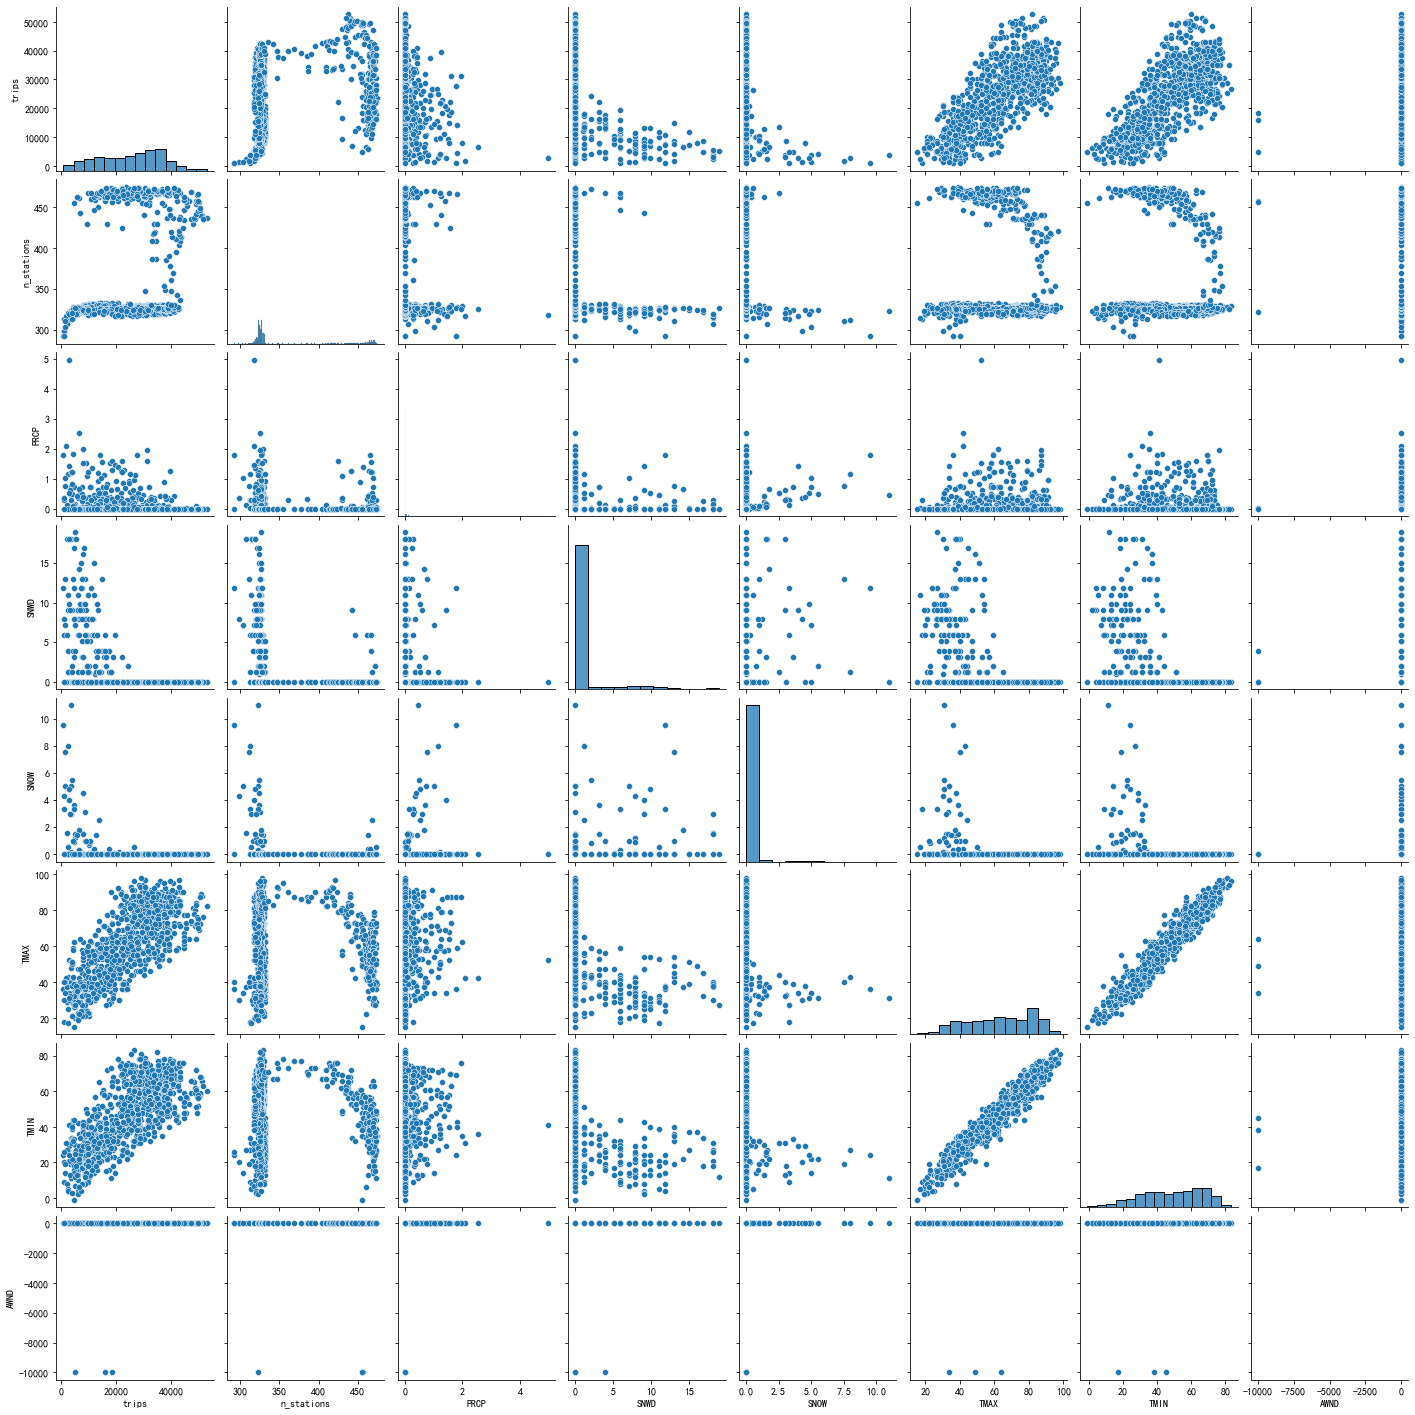

In [39]:
quantvars = ['trips', 'n_stations', 'PRCP', 'SNWD', 'SNOW', 'TMAX', 'TMIN', 'AWND']
sns.pairplot(merged_train_drop[quantvars])

## Part c: Linear regression

Fit a linear regression model to predict the number of trips per day. 

Include all the features in the data. 

Print the summary of your model using the statsmodels `summary()` method. 

In [41]:
formula = "trips ~ " + '+'.join(merged_train_drop.columns[1:]) + '+1'
mod = smf.ols(formula = formula, data = merged_train_drop)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  trips   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     268.5
Date:                Sat, 04 Mar 2023   Prob (F-statistic):               0.00
Time:                        13:31:51   Log-Likelihood:                -9747.3
No. Observations:                1001   AIC:                         1.955e+04
Df Residuals:                     975   BIC:                         1.967e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.611e+04   1320.888    -12.194      0.000   -1.87e+04   -1.35e+04
holiday[T.True]    -1.058e+04    805.400    -13.138      0.000   -1.22e+04   -9001.089
month[T.Aug]        4468.0243    805.891      5.544      0.000    2886.544    6049.505
month[T.Dec]       -2764.7084    755.960     -3.657      0.000   -4248.204   -1281.213
month[T.Feb]       -5353.6730    922.892     -5.801      0.000   -7164.756   -3542.590
month[T.Jan]       -4875.6281    836.122     -5.831      0.000   -6516.434   -3234.822
month[T.Jul]        2719.9104    836.859      3.250      0.001    1077.657    4362.163
month[T.Jun]        4527.3699    835.066      5.422      0.000    2888.636    6166.104
month[T.Mar]       -3525.1716    761.142     -4.631      0.000   -5018.837   -2031.506
month[T.May]        3747.0127    788.611      4.751      0.000    2199.443    5294.583
month[T.Nov]        2070.4324    730.316      2.835      0.005     637.261    3503.604
month[T.Oct]        6631.8221    714.951      9.276      0.000    5228.801    8034.843
month[T.Sep]        6905.1192    760.242      9.083      0.000    5413.221    8397.017
dayofweek[T.Mon]    -729.6511    495.403     -1.473      0.141   -1701.830     242.528
dayofweek[T.Sat]   -5105.2365    494.845    -10.317      0.000   -6076.320   -4134.153
dayofweek[T.Sun]   -6072.2752    496.234    -12.237      0.000   -7046.085   -5098.465
dayofweek[T.Thurs]   697.2658    491.091      1.420      0.156    -266.451    1660.982
dayofweek[T.Tues]    -92.0181    494.428     -0.186      0.852   -1062.283     878.247
dayofweek[T.Wed]     915.6479    493.435      1.856      0.064     -52.669    1883.965
n_stations            68.9045      2.888     23.855      0.000      63.236      74.573
PRCP               -8214.3391    396.200    -20.733      0.000   -8991.842   -7436.836
SNWD                -215.1752     62.855     -3.423      0.001    -338.521     -91.829
SNOW                   2.3998    188.650      0.013      0.990    -367.808     372.607
TMAX                 352.8827     29.709     11.878      0.000     294.581     411.184
TMIN                 -73.3230     32.807     -2.235      0.026    -137.704      -8.942
AWND                   0.7647      0.244      3.138      0.002       0.287       1.243
==============================================================================
Omnibus:                       56.833   Durbin-Watson:                   1.150
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.489
Skew:                          -0.345   Prob(JB):                     1.53e-27
Kurtosis:                       4.577   Cond. No.                     8.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correct

Give the mean squared error (MSE) of the trained model on the training and test set.

In [42]:
train_predict = res.predict(merged_train_drop) # (1001,)
test_predict = res.predict(merged_test_drop)   # (183,)
mse_train = np.mean((train_predict - merged_train_drop['trips'])**2)
mse_test = np.mean((test_predict - merged_test_drop['trips'])**2)

print("MSE of training set = ",mse_train)
print("MSE of test set = ",mse_test)

MSE of training set =  16806560.885612782
MSE of test set =  51443733.864820085


MSEs are quite big, look at **Pearson correlation and $R^2$** instead

In [47]:
# Pearson Correlation matrix
cor_test = np.corrcoef(test_predict,merged_test_drop['trips']) # prediction performance is pretty good
cor_train = np.corrcoef(train_predict,merged_train_drop['trips']) 
cor_test, cor_train

(array([[1.        , 0.84633844],
        [0.84633844, 1.        ]]),
 array([[1.        , 0.93443945],
        [0.93443945, 1.        ]]))

In [48]:
# R^2
def R2(yhat, y):
    return 1 - np.mean((yhat - y)**2)/np.mean((np.mean(y) - y)**2)

R2_test = R2(test_predict, merged_test_drop['trips'])
R2_train = R2(train_predict, merged_train_drop['trips'])
R2_test, R2_train

(0.601244489805357, 0.8731770902908753)

## Part d: KNN Classification

transform the outcome variable $Y$ to allow classification. 

$$
Y_i = \mathbf{1} \{ \textrm{trips}[i] > \textrm{median}(\textrm{trips}) \}
$$

### Pre-processing

In [ ]:
## Step 1: transform numerical outcome to binary outcome
# median of the variable from the full data (training and test combined). 
median_trips = np.median(pd.concat([merged_train_drop['trips'], merged_test_drop['trips']]))

ytrain = merged_train_drop['trips'] > median_trips

ytest = merged_test_drop['trips'] > median_trips

# Drop the original trips column from the train and test set
# Add the above constructed y vector to the respective train and test set
new_train_set = merged_train_drop.drop('trips',axis=1)
new_train_set['trips'] = ytrain
new_test_set = merged_test_drop.drop('trips', axis=1)
new_test_set['trips'] = ytest

## Step 2 dropping categorical variables bc Euclidean distance doesn't make sense for them

# Option 1: df.select_dtypes()
[new_train_set.drop(x, axis=1,inplace=True) for x in new_train_set.iloc[:,:-1].select_dtypes(include=['bool','object'])]
[new_test_set.drop(x, axis=1,inplace=True) for x in new_test_set.iloc[:,:-1].select_dtypes(include=['bool','object'])]

# Option 2: specify column names
# newquantvars = ['tripsind', 'n_stations', 'PRCP', 'SNWD', 'SNOW', 'TMAX', 'TMIN', 'AWND']
# new_train_set = new_train_set[newquantvars]
# new_test_set = new_test_set[newquantvars]

## Step 3 standardization
m = new_train_set.iloc[:,:-1].mean()  # (7,) m = np.mean(new_train_set.iloc[:,:-1], axis=0)
s = new_train_set.iloc[:,:-1].std()   #  (7,)s = np.std(new_train_set.iloc[:,:-1], axis=0)
standard_train = (new_train_set.iloc[:,:-1] - m )/s 
standard_test = (new_test_set.iloc[:,:-1] - m) /s 

**Standardization**

Standardize the numeric predictors so that they have mean zero and constant standard deviation. 

Subtract the mean `m` from each column of the training and test set. 

For example, from every element of the column `new_train_set['AWND']` subtract `m['AWND']`. 

Divide each column of the training and test set with `s`. For example, divid every element in the column standard_train['AWND'] by s['AWND']. 

This operation can be done using broadcasting.

When the variation between column is very different, we often standardize columns so that the statistics are similar. 

The above approach is one method. 

Another is to just ensure that the columns are all bounded between the same values. 

For linear regression this doesn't theoretically matter, but can help numerically. 

In nearest neighbors this matters a lot. Why?

**Answer**

If one variable is on the scale of billions while another is on the scaled of tens, then the one that is on the scale of billions probably contributes more to the error. 

Thus, our nearest neighbors will bias towards examples that are close in the billions scale feature and ignore the others. 

Standardizing helps put every feature on the same footing when computing the distanes.

### Training and testing

Use the sklearn neighbors library to perform $k$-nearest neighbor classification. 

Fit a classifier for $k = 1:50$, 

find the mis-classification rate on both the training and test sets for each $k$. 

On a single plot, show the training set error and the test set error as a function of $k$. 

How would you choose the optimal $k$? 

Comment on your findings, and in particular on the possibility of overfitting.

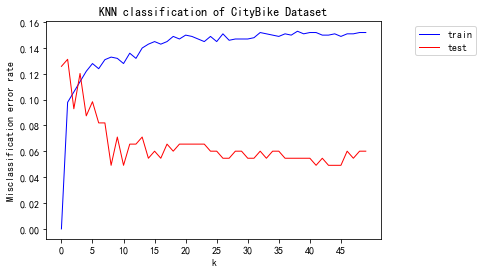

In [69]:
from sklearn import neighbors
X_train = standard_train
X_test = standard_test
ktotry = np.arange(1,51,1)
test_error = np.zeros(len(ktotry))
train_error = np.zeros(len(ktotry))

for i,k in enumerate(ktotry):
    model = neighbors.KNeighborsClassifier(n_neighbors=k).fit(X_train, ytrain)
    train_error[i] = sum(model.predict(X_train) != ytrain) / len(ytrain)
    test_error[i] = sum(model.predict(X_test) != ytest) / len(ytest)
    
plt.plot(train_error,color='blue',linewidth=1, label='train')
plt.plot(test_error,color='red',linewidth=1,label='test')
plt.legend(bbox_to_anchor=(1.3, 1))
plt.xlabel("k")
plt.ylabel("Misclassification error rate")
plt.title("KNN classification of CityBike Dataset")
plt.xticks(np.arange(0, 50, 5))
plt.show()

#### Your discussion here: You'll notice something a bit strange about the test set versus the training set and the errors. What do you think that is?

Interestingly, the test error performs better than the training. 

This is likely due to the fact the test set is during easier months and the training set includes many more seasons. 

Namely, during most of the time in the test test the trips are greater than the full_median.